<a href="https://colab.research.google.com/github/bammu27/ML/blob/main/Copy_of_Medical.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**MEDICAL COST PREDICTION**

In [ ]:
import pandas as pd

In [ ]:
medical_charges_url = 'https://raw.githubusercontent.com/JovianML/opendatasets/master/data/medical-charges.csv'

In [ ]:
from urllib.request import urlretrieve

In [ ]:
urlretrieve(medical_charges_url, 'medical.csv')

('medical.csv', <http.client.HTTPMessage at 0x7f9d0eb8b370>)

In [ ]:
df = pd.read_csv("medical.csv")

In [ ]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [ ]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [ ]:
df['age'].unique()

array([19, 18, 28, 33, 32, 31, 46, 37, 60, 25, 62, 23, 56, 27, 52, 30, 34,
       59, 63, 55, 22, 26, 35, 24, 41, 38, 36, 21, 48, 40, 58, 53, 43, 64,
       20, 61, 44, 57, 29, 45, 54, 49, 47, 51, 42, 50, 39])

In [ ]:
df['age'].value_counts().head()

18    69
19    68
50    29
51    29
47    29
Name: age, dtype: int64

In [ ]:
import plotly.express as px
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

***Understanding of Dataset***

In [ ]:
fig = px.histogram(df,x='age',marginal='box',nbins=45,title='Distribution Age ')
fig.update_layout(bargap=0.1)
fig.show()

In [ ]:
#gender distribution

df['sex'].value_counts()

male      676
female    662
Name: sex, dtype: int64

In [ ]:
fig = px.histogram(df,x='bmi',nbins=45,title='Body mass indicator Distribution')
fig.update_layout(bargap=0.1)
fig.show()

In [ ]:
fig = px.histogram(df,x='charges',nbins=45,title='cost Distribution',color='sex')
fig.update_layout(bargap=0.1)
fig.show()

In [ ]:
fig = px.histogram(df,x='charges',nbins=45,title='cost Distribution based on region',color='region')
fig.update_layout(bargap=0.1)
fig.show()

***Correlation between data***

In [ ]:
df['charges'].describe()

count     1338.000000
mean     13270.422265
std      12110.011237
min       1121.873900
25%       4740.287150
50%       9382.033000
75%      16639.912515
max      63770.428010
Name: charges, dtype: float64

In [ ]:
df.corr()

<ipython-input-20-2f6f6606aa2c>:1: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



,age,bmi,children,charges
age,1.000000,0.109272,0.042469,0.299008
bmi,0.109272,1.000000,0.012759,0.198341
children,0.042469,0.012759,1.000000,0.067998
charges,0.299008,0.198341,0.067998,1.000000


In [ ]:
fig  = px.scatter(df,x='bmi',y='charges',title='cost V/S bmi',hover_data=['sex'],color='smoker')
fig.show()

In [ ]:
fig  = px.scatter(df,x='age',y='charges',title=' cost V/S age' ,color='sex')
fig.show()

In [ ]:
age_df = df.groupby('age').aggregate('mean')

<ipython-input-23-17982de2998a>:1: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



In [ ]:
age_df.head()

,bmi,children,charges
age,,,
18,31.326159,0.449275,7086.217556
19,28.596912,0.426471,9747.909335
20,30.632759,0.862069,10159.697736
21,28.185714,0.785714,4730.464330
22,31.087679,0.714286,10012.932802


In [ ]:
age_df = age_df.reset_index()

In [ ]:
fig = px.bar(age_df,x='age',y='charges',title='age V/S charges')
fig.show()

***Linear Regression![pexels-katja-592077.jpg](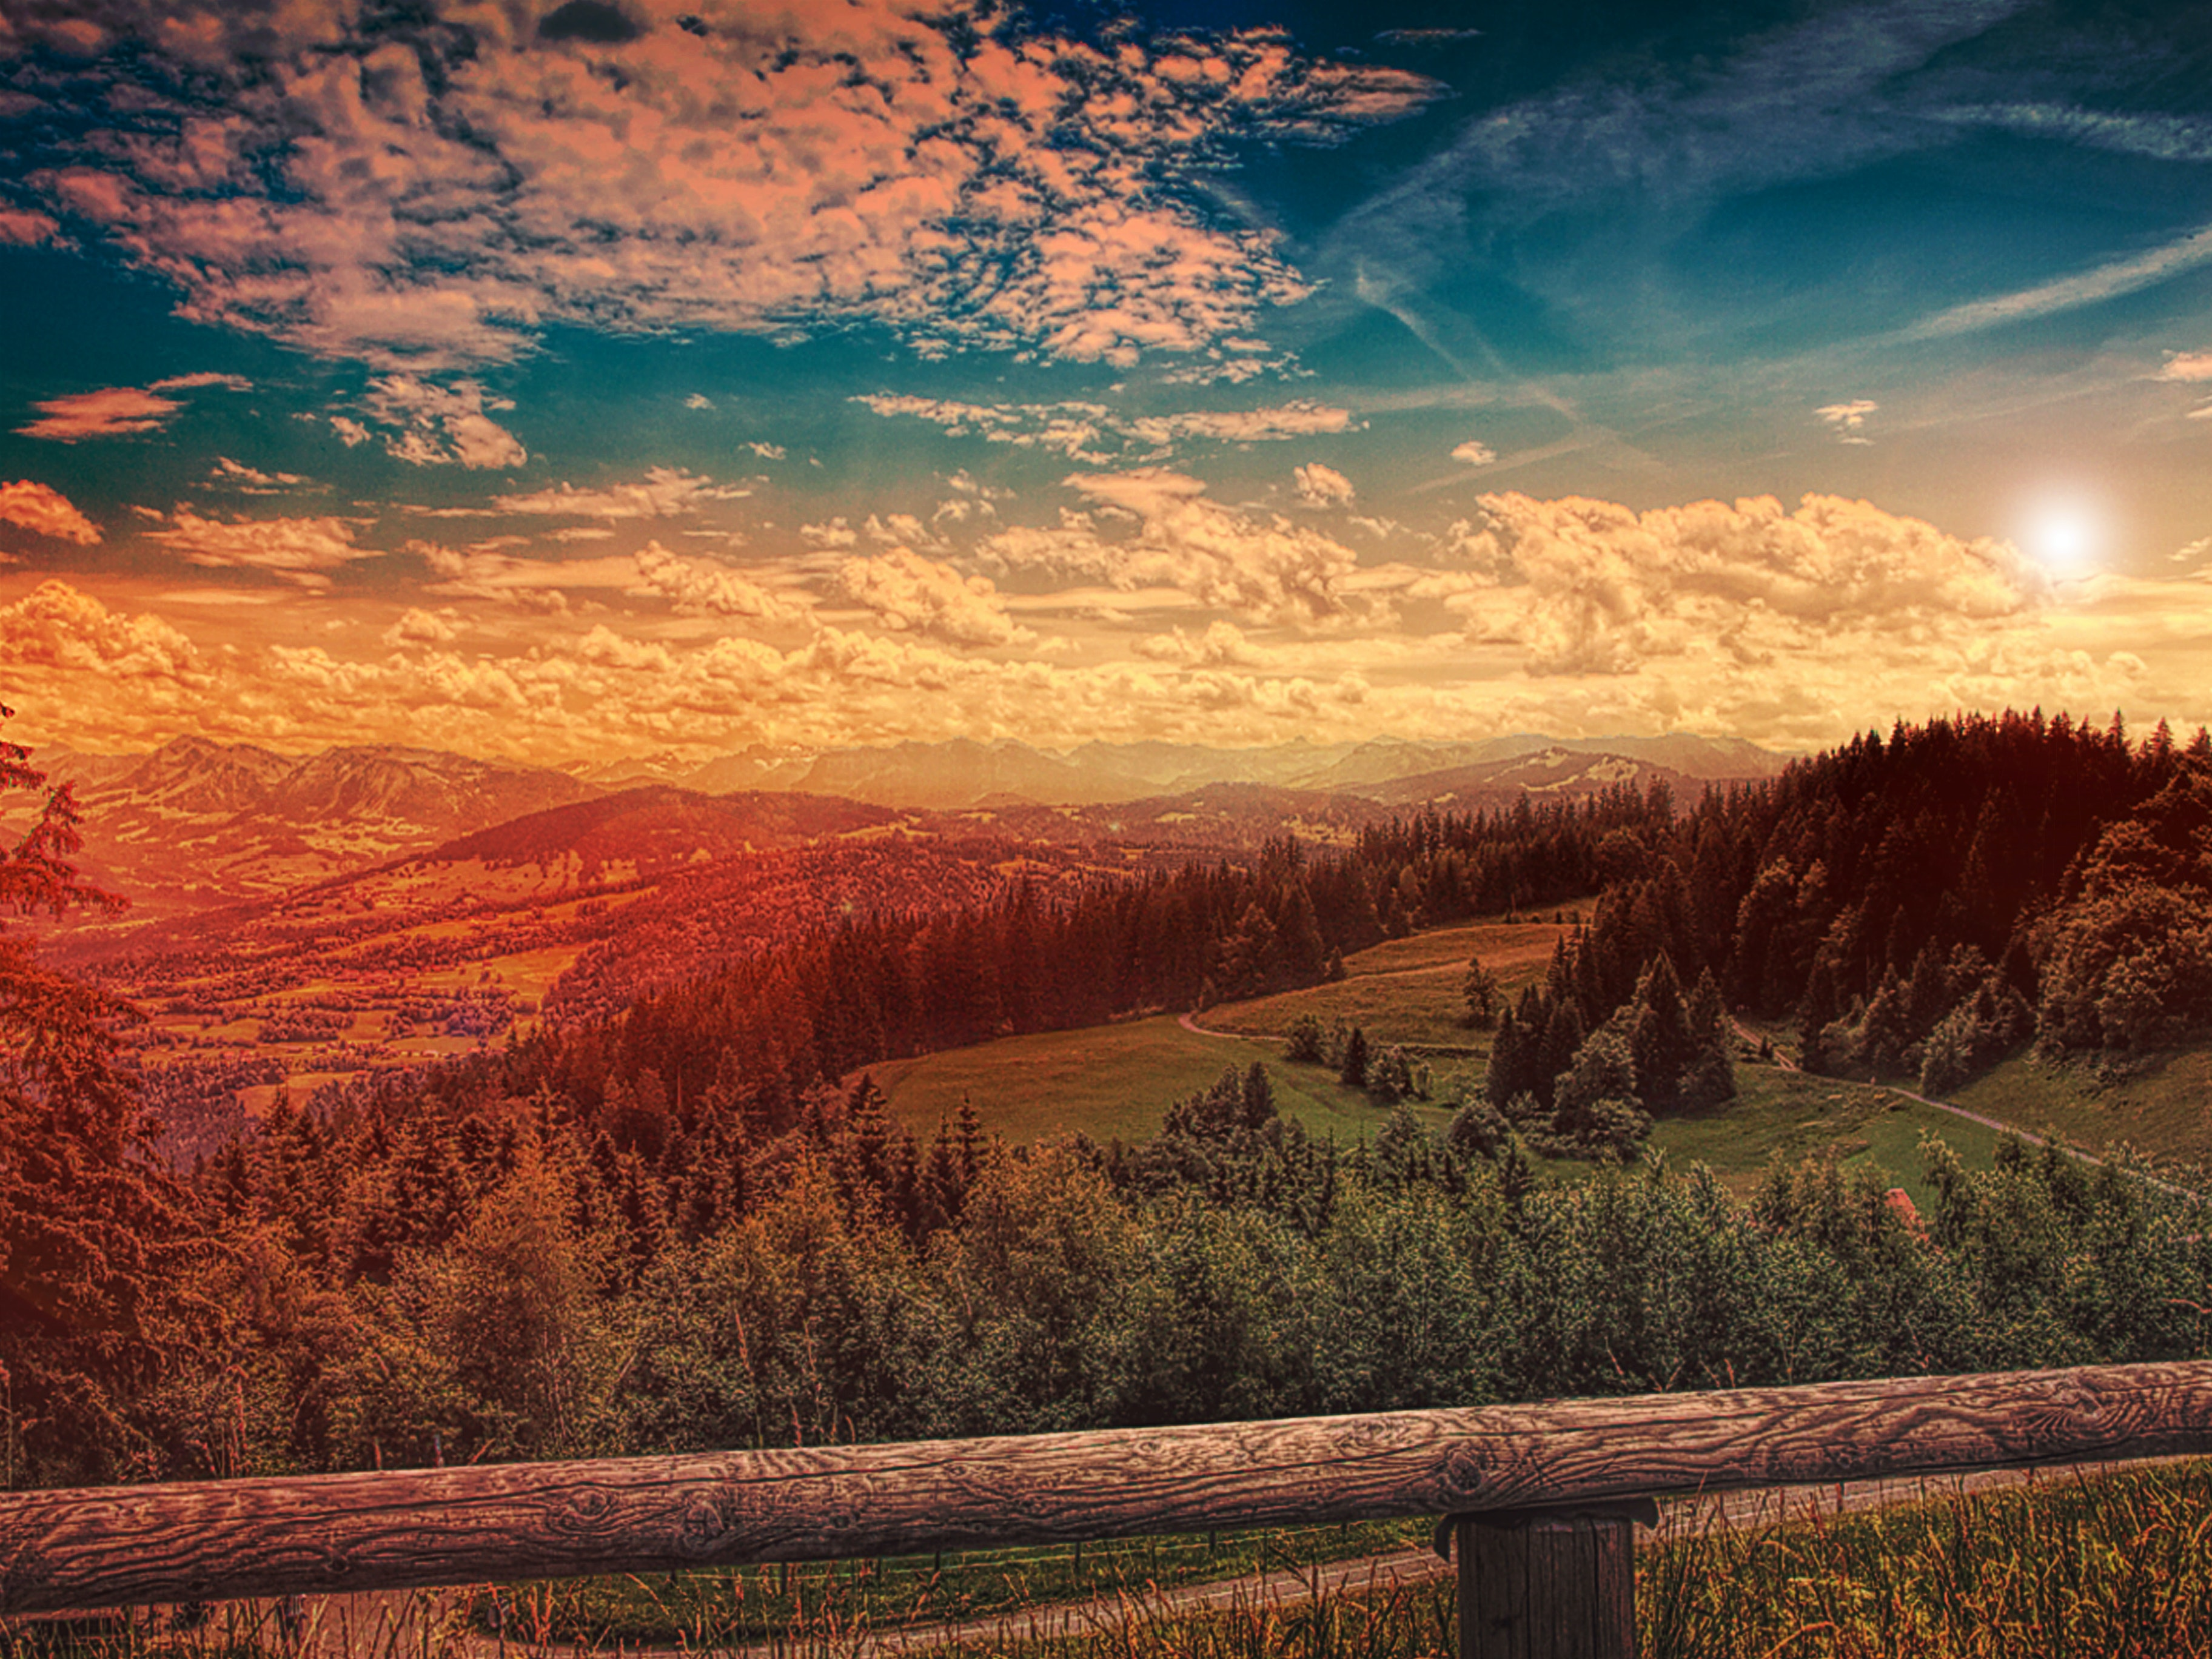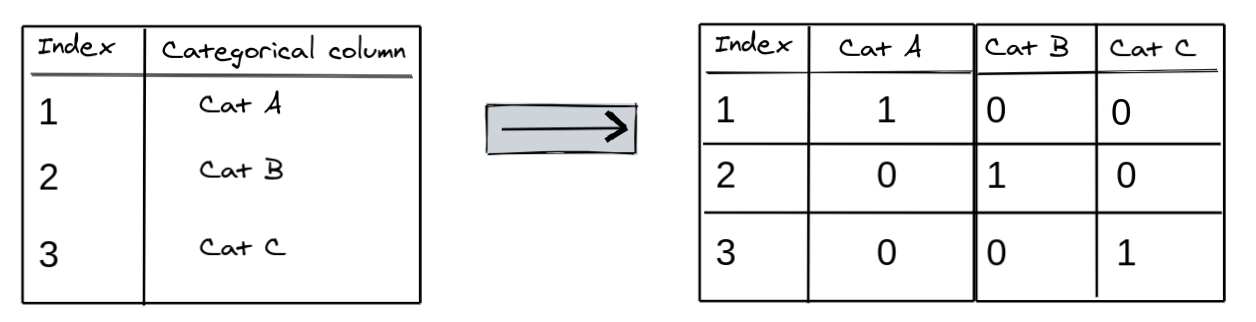)***

In [ ]:
non_smoker_df = df[df['smoker']=='no']

In [ ]:
non_smoker_df.head()

,age,sex,bmi,children,smoker,region,charges
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
5,31,female,25.740,0,no,southeast,3756.62160


In [ ]:
non_smoker_df.loc[:,['age','charges']].corr()

,age,charges
age,1.000000,0.627947
charges,0.627947,1.000000


age and charges are highly correlated

 charges = W*age+B

In [ ]:
import numpy as np


def estimate_charge(W, B, age):
    return W * age + B


In [ ]:
def rmse(targets, predictions):
    return np.sqrt(np.mean(np.square(targets - predictions)))

In [ ]:
def cost(actual, predicted):
    return np.mean((predicted - actual) ** 2)

In [ ]:

def LinearRegression():
    age = non_smoker_df['age']
    B = 0
    W = np.zeros(len(non_smoker_df))
    alph = float(input('Set alpha: '))
    iteration = int(input('Enter number of iterations: '))
    actual = non_smoker_df['charges']

    cost_history = []

    for i in range(iteration):
        predicted = estimate_charge(W, B, age)
        W = W - alph * np.dot((predicted - actual), age) / len(age)
        B = B - alph * np.mean(predicted - actual)

        current_cost = cost(actual, predicted)
        cost_history.append(current_cost)
        print(f"Iteration {i + 1}: Cost = {current_cost}")

    plt.plot(range(1, iteration + 1), cost_history, marker='o')
    plt.xlabel('Iteration')
    plt.ylabel('Cost')
    plt.title('Cost over Iterations')
    plt.show()

    plt.plot(age, estimate_charge(W, B, age), 'r', alpha=0.9)
    plt.scatter(age, actual, alpha=0.8)
    plt.xlabel('Age')
    plt.ylabel('Charges')
    plt.legend(['Prediction', 'Actual'])
    plt.show()

    print("Final Parameters:")
    print(f"Intercept (B): {B}")
    print(f"Coefficients (W): {W}")

# Assuming you have a DataFrame called non_smoker_df
# with columns 'age' and 'charges', and it is properly imported




**Linear Regression using Scikit-learn**

*single feature*

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
model = LinearRegression()

In [ ]:
input = non_smoker_df[['age']]#input must be 2D array
target = non_smoker_df['charges']

model.fit(input,target)

LinearRegression()

In [ ]:
predications = model.predict(input)

In [ ]:
predications

array([2719.0598744 , 5391.54900271, 6727.79356686, ..., 2719.0598744 ,
       2719.0598744 , 3520.80661289])

In [ ]:
#cost

Cost = cost(target,predications)
Rmse = rmse(target,predications)

In [ ]:
print(f"COST of model:{Cost}")
print(f"Root mean Square Error:{Rmse}")

COST of model:21738960.023917634
Root mean Square Error:4662.505766636395


In [ ]:
# w
W = model.coef_
print(f"Slope (W):{W}")

Slope (W):[267.24891283]


In [ ]:
#B
B = model.intercept_
print(f"Intercept (B):{B}")

Intercept (B):-2091.4205565650864


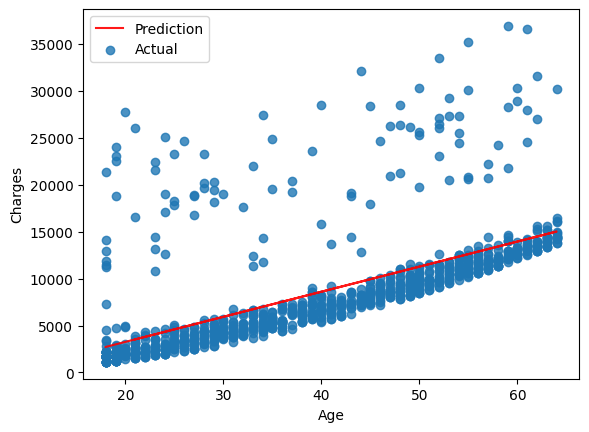

In [ ]:
plt.plot(input, predications, 'r', alpha=0.9)
plt.scatter(input, target, alpha=0.8)
plt.xlabel('Age')
plt.ylabel('Charges')
plt.legend(['Prediction', 'Actual'])
plt.show()

**Multiple Features**

*features:- age,bmi*

In [ ]:
#charge = W1*age+W2*bmi+b

input ,target = non_smoker_df[['age','bmi']],non_smoker_df['charges']

model = LinearRegression()

model.fit(input,target)

predications = model.predict(input)

Cost = cost(target,predications)
Rmse = rmse(target,predications)

print(f"Cost:{Cost}")
print(f"rmse:{Rmse}")

cor = non_smoker_df.charges.corr(non_smoker_df.bmi)
print(f"correlation:{cor}")

Cost:21737160.97570714
rmse:4662.3128354612945
correlation:0.0840365431283327


 *conclusion: after including there not that musch diffrence in cost there for charge is not depend on bmi*

In [ ]:
fig = px.scatter_3d(non_smoker_df, x='age', y='bmi', z='charges')
fig.update_traces(marker_size=3, marker_opacity=0.5)
fig.show()

In [ ]:
model.coef_, model.intercept_

(array([241.9307779 , 332.96509081]), -6424.804612240769)

*features:-age,bmi,children*

non smoker

In [ ]:
#charge = W1*age+W2*bmi+W3*children


input ,target =non_smoker_df[['age','bmi','children']],non_smoker_df['charges']

model = LinearRegression()

model.fit(input,target)

predications = model.predict(input)

Cost = cost(target,predications)
Rmse = rmse(target,predications)

print(f"Cost:{Cost}")
print(f"rmse:{Rmse}")
print(f"correlation:{non_smoker_df.charges.corr(df['children'])}")


fig = px.strip(non_smoker_df, x='children', y='charges', title= "Children vs. Charges")
fig.update_traces(marker_size=4, marker_opacity=0.7)
fig.show()


Cost:21237999.474113382
rmse:4608.470405038247
correlation:0.13892870453542192


In [ ]:
input ,target = df[['age','bmi','children']],df['charges']

model = LinearRegression()

model.fit(input,target)

predications = model.predict(input)

Cost = cost(target,predications)
Rmse = rmse(target,predications)

print(f"Cost:{Cost}")
print(f"rmse:{Rmse}")
print(f"correlation:{non_smoker_df.charges.corr(df['children'])}")


fig = px.strip(df, x='children', y='charges', title= "Children vs. Charges")
fig.update_traces(marker_size=4, marker_opacity=0.7)
fig.show()

Cost:128943244.63563198
rmse:11355.317901125973
correlation:0.13892870453542192


After including children cost decrease little bit no children some siginificance  in the cose

**Using Categorical Features**

*feature:- age ,bmi ,children ,smoker*

In [ ]:
smoker_dict = {'yes':1,'no':0}
df['smoker_code'] = df['smoker'].map(smoker_dict)

In [ ]:
df.head()

,age,sex,bmi,children,smoker,region,charges,smoker_code
0,19,female,27.900,0,yes,southwest,16884.92400,1
1,18,male,33.770,1,no,southeast,1725.55230,0
2,28,male,33.000,3,no,southeast,4449.46200,0
3,33,male,22.705,0,no,northwest,21984.47061,0
4,32,male,28.880,0,no,northwest,3866.85520,0


In [ ]:
df['charges'].corr(df.smoker_code)

0.787251430498478

In [ ]:
smoke_df = df[['smoker_code','charges']].groupby('smoker_code').aggregate('mean').reset_index()

smoke_df

,smoker_code,charges
0,0,8434.268298
1,1,32050.231832


<Axes: xlabel='smoker_code', ylabel='charges'>

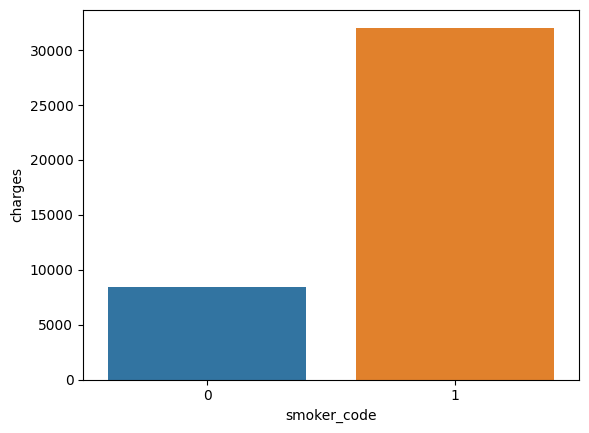

In [ ]:
sns.barplot(data = smoke_df,x='smoker_code',y='charges')

In [ ]:
input ,target = df[['age','bmi','children','smoker_code']] ,df['charges']

model.fit(input,target)

predications = model.predict(input)

Cost = cost(target,predications)
Rmse = rmse(target,predications)

print(f"Cost:{Cost}")
print(f"rmse:{Rmse}")


Cost:36680455.99149378
rmse:6056.439217188081


conclusion:- After including smoker_code feature cost decrease  

features:-age,bmi,children,smoker_code,sex

<Axes: xlabel='sex_code', ylabel='charges'>

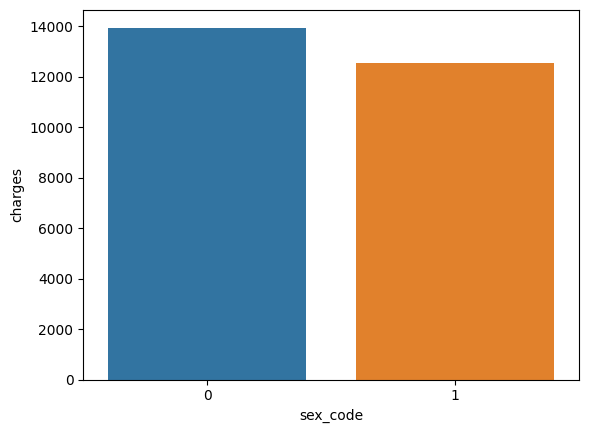

In [ ]:
#male:0 female:1
sex_dict = {'female':1,'male':0}
df['sex_code'] = df['sex'].map(sex_dict)

sex_df = df[['sex_code','charges']].groupby('sex_code').aggregate('mean').reset_index()

sns.barplot(data = sex_df,x='sex_code',y='charges')

In [ ]:
input ,target = df[['age','bmi','children','smoker_code','sex_code']] ,df['charges']

model.fit(input,target)

predications = model.predict(input)

Cost = cost(target,predications)
Rmse = rmse(target,predications)

print(f"Cost:{Cost}")
print(f"rmse:{Rmse}")
cor = df['charges'].corr(df.sex_code)
print(f"correlation:{cor}")

Cost:36676355.79457731
rmse:6056.100708754546
correlation:-0.057292062202025484


conclusion:after adding sex as feature there is no change cost

**One-hot Encoding**

feature:-age,bmi,children,smoker_code,sex,region

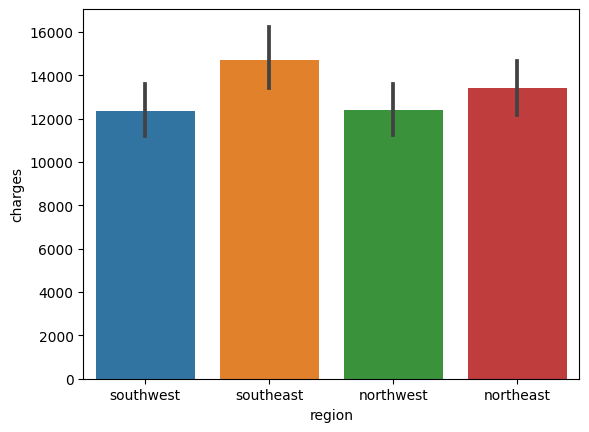

In [ ]:
sns.barplot(data=df, x='region', y='charges');

In [ ]:
from sklearn import preprocessing

enc = preprocessing.OneHotEncoder()

enc.fit(df[['region']])
enc.categories_

[array(['northeast', 'northwest', 'southeast', 'southwest'], dtype=object)]

In [ ]:
one_hot = enc.transform(df[['region']]).toarray()

one_hot


array([[0., 0., 0., 1.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       ...,
       [0., 0., 1., 0.],
       [0., 0., 0., 1.],
       [0., 1., 0., 0.]])

In [ ]:
df[['northeast', 'northwest', 'southeast', 'southwest']] = one_hot

In [ ]:
df.head()

,age,sex,bmi,children,smoker,region,charges,smoker_code,sex_code,northeast,northwest,southeast,southwest
0,19,female,27.900,0,yes,southwest,16884.92400,1,1,0.0,0.0,0.0,1.0
1,18,male,33.770,1,no,southeast,1725.55230,0,0,0.0,0.0,1.0,0.0
2,28,male,33.000,3,no,southeast,4449.46200,0,0,0.0,0.0,1.0,0.0
3,33,male,22.705,0,no,northwest,21984.47061,0,0,0.0,1.0,0.0,0.0
4,32,male,28.880,0,no,northwest,3866.85520,0,0,0.0,1.0,0.0,0.0


In [ ]:

input_cols = ['age', 'bmi', 'children', 'smoker_code', 'sex_code', 'northeast', 'northwest', 'southeast', 'southwest']
inputs, targets = df[input_cols], df['charges']


model = LinearRegression().fit(inputs, targets)

predictions = model.predict(inputs)

Cost = cost(targets,predictions)
loss = rmse(targets, predictions)


print(f"cost:{Cost}")
print(f"rmse:{loss}")

cost:36501893.00741544
rmse:6041.6796511744515


**Model Improvement**

In [ ]:
model.coef_

array([  256.85635254,   339.19345361,   475.50054515, 23848.53454191,
         131.3143594 ,   587.00923503,   234.0453356 ,  -448.01281436,
        -373.04175627])

In [ ]:
model.intercept_

-12656.862170590564

In [ ]:
weights = pd.DataFrame({
    'feature':np.append(input_cols,1),
    'weight': np.append(model.coef_, model.intercept_)
})

In [ ]:
weights

,feature,weight
0,age,256.856353
1,bmi,339.193454
2,children,475.500545
3,smoker_code,23848.534542
4,sex_code,131.314359
5,northeast,587.009235
6,northwest,234.045336
7,southeast,-448.012814
8,southwest,-373.041756
9,1,-12656.862171


In [ ]:
from sklearn.preprocessing import StandardScaler

numeric_cols = ['age', 'bmi', 'children']
scaler = StandardScaler()
scaler.fit(df[numeric_cols])



StandardScaler()

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
scaler.mean_

array([39.20702541, 30.66339686,  1.09491779])

In [ ]:
scaler.var_

array([197.25385199,  37.16008997,   1.45212664])

In [ ]:
scaled_inputs = scaler.transform(df[numeric_cols])
scaled_inputs

array([[-1.43876426, -0.45332   , -0.90861367],
       [-1.50996545,  0.5096211 , -0.07876719],
       [-0.79795355,  0.38330685,  1.58092576],
       ...,
       [-1.50996545,  1.0148781 , -0.90861367],
       [-1.29636188, -0.79781341, -0.90861367],
       [ 1.55168573, -0.26138796, -0.90861367]])

In [ ]:
cat_cols = ['smoker_code', 'sex_code', 'northeast', 'northwest', 'southeast', 'southwest']
categorical_data = df[cat_cols].values

In [ ]:
inputs = np.concatenate((scaled_inputs, categorical_data), axis=1)
targets = df.charges


model = LinearRegression().fit(inputs, targets)


predictions = model.predict(inputs)

loss = rmse(targets, predictions)
print('Loss:', loss)

Loss: 6041.6796511744515


In [ ]:
weights_df = pd.DataFrame({
    'feature': np.append(numeric_cols + cat_cols, 1),
    'weight': np.append(model.coef_, model.intercept_)
})
weights_df.sort_values('weight', ascending=False)

,feature,weight
3,smoker_code,23848.534542
9,1,8335.168856
0,age,3607.472736
1,bmi,2067.691966
5,northeast,587.009235
2,children,572.998210
6,northwest,234.045336
4,sex_code,131.314359
8,southwest,-373.041756
7,southeast,-448.012814
